# Продажа квартир в Санкт-Петербурге - анализ рынка недвижимости

**Задача:** определить параметры, влияющие на стоимость недвижимость в Санкт-Петербурге и соседних населенных пунктах. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Исходные данные:** архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет сервиса Яндекс.Недвижимость. По каждой квартире на продажу доступны два вида данных: первые вписаны пользователем, вторые получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма). 

<a id='content'></a>
## Оглавление 
[Предварительный анализ данных](#1)

[Предобработка данных](#2)
 
[Исследовательский анализ данных](#3)

[Вывод](#4)

<a id = '1'></a>
## Предварительный анализ данных

In [ ]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# чтение данных из файлов
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

# информация о типе данных и пропусках
data.info()

# проверка, что данные считались корректно
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<b>Вывод.</b>

first_day_exposition - не соответствующий тип данных (должен быть тип datetime вместо object). Часы, минуты и секунды равны нулю

ceiling_height, living_area, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - содержат нулевые значения

floors_total, parks_around3000, ponds_around3000, days_exposition - должен быть тип int вместо float

is_apartment - должен быть тип bool вместо object

[К оглавлению](#content)

<a id = '2'></a>
## Предобработка данных

In [2]:
# получение название всех столбцов
print(data.columns)
print()

# проверка на наличие дубликатов
print(data.duplicated().sum())

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

0


Явных и неявных дубликатов нет

In [3]:
# проверим столбец 'total_images'
print(data.groupby('total_images')['total_images'].count()) 

total_images
0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64


1059 квартир без изображений (total_images = 0)

In [4]:
# проверим столбец 'last_price'
print(data.groupby('last_price')['last_price'].count()) 

# изменим тип данных на int
data['last_price'] = data['last_price'].astype('int') 

# изменим неправдоподобную цену 12190 на медианную
last_price_median = data['last_price'].median().astype('int')
data['last_price'] = data['last_price'].replace(12190, last_price_median) 

last_price
12190.0        1
430000.0       2
440000.0       1
450000.0       4
470000.0       3
              ..
300000000.0    1
330000000.0    1
401300000.0    1
420000000.0    1
763000000.0    1
Name: last_price, Length: 2978, dtype: int64


Неправдоподобно низкая цена 12190 - похоже на выброс. Предполагаю, что при вводе цена была указана не в рублях, а в тысячах рублей. Заменила данное значение на медианное

In [5]:
# проверим столбец 'total_area'
print(data.groupby('total_area')['total_area'].count())

total_area
12.0     1
13.0     3
13.2     1
14.0     1
15.0     2
        ..
590.0    1
618.0    1
631.0    1
631.2    1
900.0    1
Name: total_area, Length: 2182, dtype: int64


Выбросы отсутствуют,  пропущенных значений нет

In [6]:
# переводим формат в столбце first_day_exposition в datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') 
print(data['first_day_exposition'].head()) # проверим, что перевод корректный

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


Формат данных в столбце first_day_exposition был изменен с object на datetime. Поскольку часы, минуты и секунды были равны нулю, эти данные не были сохранены при переводе

In [7]:
# проверим столбец 'rooms'
print(data.groupby('rooms')['rooms'].count()) 

rooms
0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64


В 197 квартирах 0 комнат. Возможно это студии или пропущенные данные. Т к у нас нет информации о возможных причинах появления нулевых значений, данные оставлю без изменений.  При дальнейшем анализе влияния числа комнат на цену недвижимости 0 комнат из анализа будут исключены.

In [8]:
# проверим столбец 'ceiling_height'
print(data.groupby('ceiling_height')['ceiling_height'].count()) 

#посмотрим описательную статистику
print(data['ceiling_height'].describe())   

# проверим число пропущенных значений
print('Число пропущенных значений в ceiling_height: ', data['ceiling_height'].isna().sum()) 

# пропущенные значения заменим на нули и исключим их из анализа
data['ceiling_height'] = data['ceiling_height'].fillna(0)


ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 183, dtype: int64
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
Число пропущенных значений в ceiling_height:  9195


Наблюдается большое число пропущенных значений - 39% от всей выборки. Пропущенные значения были заменены на нули и в дальнейщем будут исключены из анализа. Замена пропущенных значений на средние или медианные значения при таком таком большой числе пропусков привела бы к сильному искажению результата, а именно характеристик рассеивания.

Неправдоподобными выглядят минимальные (1, 1.2) и максимальные (32, 100) значения высоты потолка. Возможно, некоторые из них это опечатки (32 вместо 3.2). Я бы уточнила у коллег, которые формировали данные, о возможной причине данного феномена.

In [9]:
# проверим столбец 'floors_total'
print(data.groupby('floors_total')['floors_total'].count())
data['floors_total'].astype('int', errors = 'ignore')
print('Число пропущенных значений в floors_total: ', data['floors_total'].isna().sum())

floors_total
1.0       25
2.0      383
3.0      668
4.0     1200
5.0     5788
6.0      914
7.0      592
8.0      390
9.0     3761
10.0    1174
11.0     203
12.0    1362
13.0     229
14.0     553
15.0     365
16.0    1376
17.0     833
18.0     505
19.0     339
20.0     271
21.0     158
22.0     286
23.0     352
24.0     469
25.0    1075
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64
Число пропущенных значений в floors_total:  86


Тип данных был приведен к int. Существуют пропущенные значения, о природе которых и возможных причинах нет информации. Для дальшейшего анализа оставлю данные без изменений, так как этот параметр не нужен для проверки поставленных гипотез

In [10]:
# проверим столбец 'living_area'
print(data.groupby('living_area')['living_area'].count())
print('Число пропущенных значений в living_area: ', data['living_area'].isna().sum()) 

living_area
2.0      2
3.0      2
5.0      1
5.4      1
6.0      1
        ..
322.3    1
332.0    1
347.5    1
409.0    1
409.7    1
Name: living_area, Length: 1782, dtype: int64
Число пропущенных значений в living_area:  1903


В выборке представлены неправдоподобно маленькие площади. Существуют пропущенные значения, о природе которых и возможных причинах нет информации. Для дальшейшего анализа оставлю данные без изменений, так как этот параметр не нужен для проверки поставленных гипотез

In [11]:
# проверим столбец 'floor'
print(data.groupby('floor')['floor'].count()) # нулевых значений нет

floor
1     2917
2     3368
3     3073
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64


Данные в порядке

In [12]:
# проверим столбец 'is_apartment'
print(data.groupby('is_apartment')['is_apartment'].count()) 
data['is_apartment'] = data['is_apartment'].fillna(False)

is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64


Поскольку всего 50 аппартементов и большое число пропусков, скорее всего столбец появился недавно. Пропуски были заменены на False

In [13]:
# проверим столбец 'studio'
print(data.groupby('studio')['studio'].count()) 

studio
False    23550
True       149
Name: studio, dtype: int64


С данными все в порядке, пропусков нет. Число студий не совпадает с числом квартир с 0 комнат

In [14]:
# проверим столбец 'open_plan'
print(data.groupby('open_plan')['open_plan'].count()) 

open_plan
False    23632
True        67
Name: open_plan, dtype: int64


С данными все в порядке, пропусков нет

In [15]:
# проверим столбец 'kitchen_area'
print(data.groupby('kitchen_area')['kitchen_area'].count()) 
print('Число пропущенных значений в kitchen_area: ', data['kitchen_area'].isna().sum()) 

kitchen_area
1.30      1
2.00      7
2.30      1
2.40      1
2.89      1
         ..
93.20     1
100.00    1
100.70    1
107.00    1
112.00    1
Name: kitchen_area, Length: 971, dtype: int64
Число пропущенных значений в kitchen_area:  2278


2278 пропущенных значений. Для дальшейшего анализа оставлю данные без изменений, так как этот параметр не нужен для проверки поставленных гипотез

In [16]:
# проверим столбец 'balcony'
print(data.groupby('balcony')['balcony'].count()) 
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

balcony
0.0    3758
1.0    4195
2.0    3659
3.0      81
4.0     183
5.0     304
Name: balcony, dtype: int64


Пропущенные значения были заменены на 0, тип данных приведен к int

In [17]:
# проверим столбец 'locality_name'
print(data.groupby('locality_name')['locality_name'].count()) 
print('Число пропущенных значений в locality_name: ', data['locality_name'].isna().sum()) # 

locality_name
Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: locality_name, Length: 364, dtype: int64
Число пропущенных значений в locality_name:  49


Пропущенных значений 49, причина непонятна. Оставим данные без изменений, т к у нас нет информации, по которой мы могли бы восстановить пропуски

In [18]:
# проверим столбец 'airports_nearest'
print(data.groupby('airports_nearest')['airports_nearest'].count()) 
print('Число пропущенных значений в airports_nearest: ', data['airports_nearest'].isna().sum()) # пропущенных значений 5542
print()

airports_nearest
0.0        1
6450.0     2
6914.0     1
6949.0     1
6989.0     6
          ..
83758.0    1
84006.0    1
84665.0    1
84853.0    1
84869.0    1
Name: airports_nearest, Length: 8275, dtype: int64
Число пропущенных значений в airports_nearest:  5542



Пропущенных значений 5542. Для дальшейшего анализа оставлю данные без изменений, так как этот параметр не нужен для проверки поставленных гипотез

In [19]:
# проверим столбец 'cityCenters_nearest'
print(data.groupby('cityCenters_nearest')['cityCenters_nearest'].count()) 
print('Число пропущенных значений в cityCenters_nearest: ', data['cityCenters_nearest'].isna().sum()) 

cityCenters_nearest
181.0      1
208.0      1
215.0      1
287.0      1
291.0      1
          ..
64857.0    1
65105.0    1
65764.0    1
65952.0    1
65968.0    1
Name: cityCenters_nearest, Length: 7642, dtype: int64
Число пропущенных значений в cityCenters_nearest:  5519


Пропущенных значений 5519, причина неизвестна. Возможно, данные квартиры находятся в центре, возможно это пропуск или баг (данный столбец заполнялся системой автоматически). У нас нет информации, по которой мы могли бы восстановить данный параметр. Поэтому оставим данные без изменений. Если бы была возможность - я бы задала вопрос коллегам, которые формировали данные. Возможно, проспуски можно заполнить

In [20]:
# проверим столбец 'parks_around3000'
print(data.groupby('parks_around3000')['parks_around3000'].count()) 
print('Число пропущенных значений в parks_around3000: ', data['parks_around3000'].isna().sum()) 

parks_around3000
0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64
Число пропущенных значений в parks_around3000:  5518


Пропущенных значений 5518. Причина возникновения пропусков неизвестна. Для дальшейшего анализа оставлю данные без изменений, так как этот параметр не нужен для проверки поставленных гипотез

In [21]:
# проверим столбец 'ponds_around3000'
print(data.groupby('ponds_around3000')['ponds_around3000'].count()) 
print('Число пропущенных значений в ponds_around3000: ', data['ponds_around3000'].isna().sum()) # пропущенных значений 5518

ponds_around3000
0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64
Число пропущенных значений в ponds_around3000:  5518


Пропущенных значений 5518. Причина возникновения пропусков неизвестна. Для дальшейшего анализа оставлю данные без изменений, так как этот параметр не нужен для проверки поставленных гипотез

In [22]:
# проверим столбец 'ponds_nearest'
print(data.groupby('ponds_nearest')['ponds_nearest'].count()) 
print('Число пропущенных значений в ponds_nearest: ', data['ponds_nearest'].isna().sum())

ponds_nearest
13.0      2
16.0      8
19.0      4
20.0      5
22.0      7
         ..
1299.0    1
1313.0    1
1337.0    1
1341.0    2
1344.0    1
Name: ponds_nearest, Length: 1096, dtype: int64
Число пропущенных значений в ponds_nearest:  14589


Пропущенных значений 14589, возникновения пропусков неизвестна. Для дальшейшего анализа оставлю данные без изменений, так как этот параметр не нужен для проверки поставленных гипотез

In [23]:
 # проверим столбец 'days_exposition'. Заменим пропуски и тип данных
print(data.groupby('days_exposition')['days_exposition'].count()) 
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

days_exposition
1.0         1
2.0         3
3.0       158
4.0       176
5.0       152
         ... 
1512.0      2
1513.0      1
1553.0      1
1572.0      1
1580.0      1
Name: days_exposition, Length: 1141, dtype: int64


Пропущенные значения заменены на 0 и не будут учитываться в дальнейшем анализе. Причина возникновения пропусков неизвестна. Данные приведены к типу int

<b>Общий вывод:</b> была произведена предобработка исходных данных, данные приведены к необходимым для последующих расчетов типам, частично заполнены пропуски. В большинстве случаев было принято решение пропуски не заполнять или заполнять их нулями и игнорировать их в дальнейших рачетах. Данное решение было принято на основании того, что у нас нет информации о возможных причинах появления пропусков (как данных которые заполнялись вручную, так и автоматических), пропуски можно отнести к случайным и использование других стратегий, например, замена средним значением по всей выборке, может исказить результат в более малых группах (например, по городам).

[К оглавлению](#content)

<a id = '3'></a>
## Исследовательский анализ данных

In [24]:
# посчитаем цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

# день недели, месяц и год публикации объявления
# день недели
data['weekday'] = data['first_day_exposition'].dt.weekday
# месяц
data['month'] = data['first_day_exposition'].dt.month
# год
data['year'] = data['first_day_exposition'].dt.year

# этаж квартиры
def floor_category(row):
    floors = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif 1 < floor < floors:
        return 'другой'
    elif floor == floors:
        return 'последний'
    
data['floor_category'] = data.apply(floor_category, axis=1)

# соотношение жилой и общей площади
data['living_total_area_ratio'] = data['living_area'] / data['total_area']

# отношение площади кухни к общей площади
data['kitchen_total_area_ratio'] = data['kitchen_area'] / data['total_area']


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


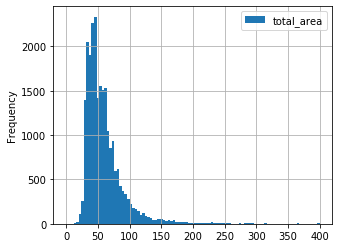

In [25]:
# общая площадь
print(data['total_area'].describe()) 
data.plot(y='total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0, 400))

Распределение данных Гаусса, есть выбросы. Общая площадь в диапозоне от 12 м^2 до 900 м^2, квантили 40, 52, 70 (медина 52 м^2) 

count    2.369900e+04
mean     6.541744e+06
std      1.088694e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


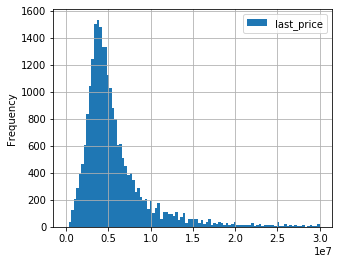

In [26]:
# цена
data.plot(y='last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0, 30000000))
print(data['last_price'].describe()) #распределение Пуассона

Цены на недвижимость в диапозоне от 0.43 млн руб до 763 млн руб., квантили 3.4, 4.7, 6.8 (медиана 4.7 млн руб). Распределение данных Гаусса.

count    23502.000000
mean         2.087993
std          1.066050
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


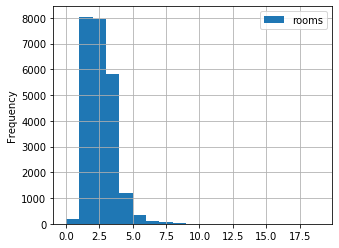

In [27]:
# число комнат
data.plot(y='rooms', kind = 'hist', bins = 19, grid=True, figsize = (5,4), range = (0, 19))
print(data[data['rooms'] != 0]['rooms'].describe()) 

Количество комнат в диапазоне от 1 до 19. Больше всего однокомнатных квартир, немногим меньше двухкомнатных

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


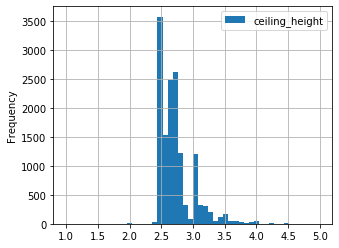

In [28]:
# высота потолков
data.plot(y='ceiling_height', kind = 'hist', bins = 50, grid=True, figsize = (5,4), range = (1, 5))
print(data[data['ceiling_height'] != 0]['ceiling_height'].describe())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f68170e2450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f68170e9b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f68170e2410>],
 'medians': [<matplotlib.lines.Line2D at 0x7f68170f1590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f68170f1ad0>],
 'means': []}

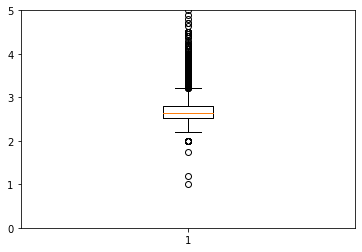

In [29]:
# посмотрим диаграмму распределения высоты потолков
plt.ylim(0, 5)
plt.boxplot(data[data['ceiling_height'] != 0]['ceiling_height'])
plt.show()

На стадии предобработки было отмечено, что неправдоподобными выглядят минимальные (1, 1.2) и максимальные (32, 100) значения высоты потолка. После пострения диаграммы распределения стало наглядно, что значения менее 2.2 и более 3.3 метров можно считать выбросами. Квантили 2.52, 2.65, 2.80 (медиана 2,65 м)

count    14504.000000
mean         2.727832
std          0.292399
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64


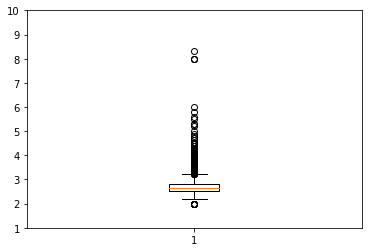

In [52]:
# заменим значения меньше 2х метров и больше 10ти метров на медианные 
bad_ceiling_height_data = data[(data['ceiling_height'] != 0) & (data['ceiling_height'] < 2.0) | (data['ceiling_height'] > 10.0)]['ceiling_height']
median_ceiling_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].replace(bad_ceiling_height_data, median_ceiling_height)

plt.ylim(1, 10)
plt.boxplot(data[data['ceiling_height'] != 0]['ceiling_height'])
plt.show()

print(data[data['ceiling_height'] != 0]['ceiling_height'].describe())

Частично выбросы значения высоты потолка были заменены на медианные значения: до двух метров и больше 20ти метров. Квантили остались без изменений, однако сильно изменилась СКО: с 1.26 на 0.29

<b>Общий вывод:</b> в данных есть значения, которые могут быть нереалистичными (0 комнат, минимальное и максимальное значение высоты потолков). О данных значениях стоит спросить у сотрудников, предоставивших выборку

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

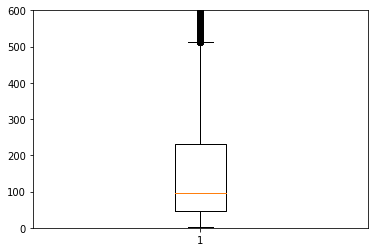

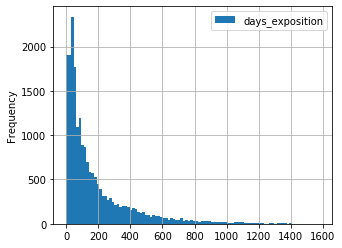

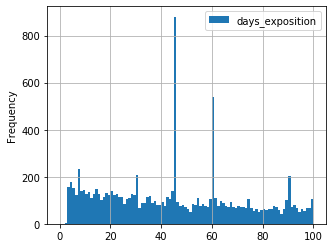

In [31]:
# Время продажи квартиры (нулевые значения из анализа исключаем).
# Cтоит учитывать, что день снятия квартиры с объявления, который мы используем в анализе,
# может не совпадать с днем продажи квартиры
plt.ylim(0, 600)
plt.boxplot(data[data['days_exposition'] != 0]['days_exposition'])
plt.show()

data[data['days_exposition'] != 0].plot(y='days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0, 1580))
data[data['days_exposition'] != 0]['days_exposition'].describe()

data[data['days_exposition'] != 0].plot(y='days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0, 100))

data[data['days_exposition'] != 0]['days_exposition'].describe()

data[data['days_exposition'] != 0]['days_exposition'].describe()


При интерпритации результата стоит учитывать, что день снятия объявления с публикации и день продажи квартиры могут не совпадать. Существует большая разница между медианой (95 дней) и средней (181 день), так же существуют выбросы в 7, 30, 45, 60 и 90 дней (максимальные пики в 45 и 60 дней). Возможно, это связано с процедурой сбора данных (существует автоматическая отсечка - если квартира в продаже дольше этого срока, то объявление снимается). Данную гипотезу нужно усточнить у сотрудников, которые собирали данные.

Для того, чтобы ответить на вопрос, какие продажи прошли очень быстро, а какие очень медленно, была построена диаграмма размаха: размах от минимального значения до примерно 500 дней. Таким образом "нормальными" можно считать сделки в диапозоне от 1 до 500, "очень быстрых" значений нет, "очень долгими" значениями могут читать значения больше 500. 

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

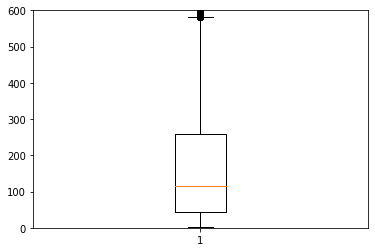

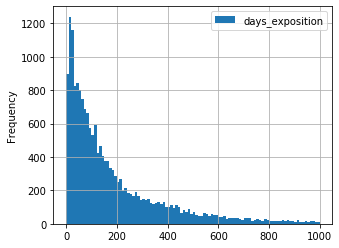

In [32]:
# отфильтруем данные от выбросов
good_data = data.query('days_exposition != 0 and days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90').reset_index(drop=True)

# диаграмма размаха
plt.ylim(0, 600)
plt.boxplot(good_data['days_exposition'])

# гистограмма
good_data.plot(y='days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0, 1000))

# описательная статистика
good_data['days_exposition'].describe()


В очищенных от выбросов данных медиана и средние значение больше, чем в неочищенных: 114 и 195 дней соответственно, вместо 95 и 180. Нормальные значения теперь в диапозоне от 1 до 580 дней вместо от 1 до 500 дней.

0.6537041315713309
0.3020256320018514


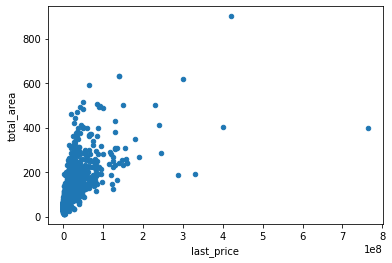

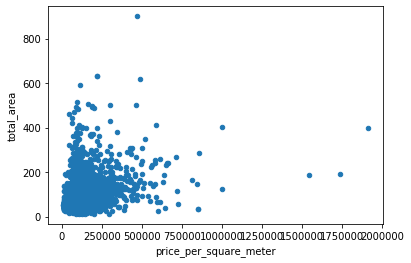

In [33]:
# цена и площадь
data.plot(x='last_price', y='total_area', kind='scatter') 
print(data['total_area'].corr(data['last_price']))

data.plot(x='price_per_square_meter', y='total_area', kind='scatter') 
print(data['total_area'].corr(data['price_per_square_meter']))


Существует средняя корреляция (0.65) между ценой на недвижимость и площадью (что логично): чем больше площадь, тем выше стоимость. При этом цена за квадратный метр слабо связана с площадью (0.30): чем больше площадь, тем выше стоимость за квадратный метр

0.364737203478692
0.059335592298397986


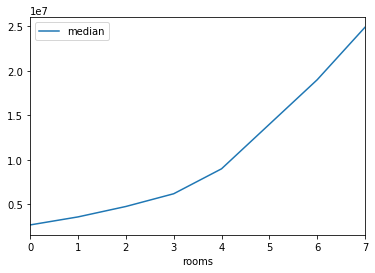

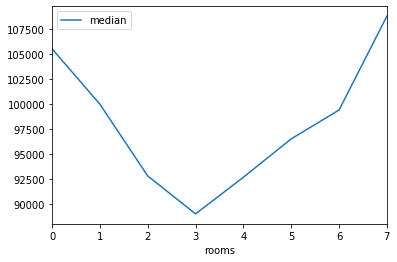

In [34]:
# цена и число комнат

# корреляции
print(data[data['rooms'] != 0]['rooms'].corr(data['last_price']))
print(data[data['rooms'] != 0]['rooms'].corr(data['price_per_square_meter']))

# оценим медиану цены  
last_price_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count', 'median'])
last_price_rooms.columns = ['count', 'median']
last_price_rooms.query('count > 12').plot(y = 'median') # не рассматриваем редкое число комнат из-за выбросов по цене

# оценим медиану цены квадратного метра 
price_per_square_meter_rooms = data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['count', 'median'])
price_per_square_meter_rooms.columns = ['count', 'median']
price_per_square_meter_rooms.query('count > 12').plot(y = 'median') # не рассматриваем редкое число комнат из-за выбросов по цене

Существует слабая корреляция (0.36) между ценой на недвижимость и числом комнат: чем больше комнат, тем выше цена на недвижимость. Зависимость между числом комнат и медианой стоимостьи квартиры монотонная, но скорее квадратичная, чем линейная. Поэтому рассматривать корреляцию как мерило связи стоит с осторожностью. 

Зависимость между числом комнат и медианой цены за квадратный метр не линейная (скорее квадратичная), поэтому рассматривать корреляцию как показатель связи мы не можем. Можно сказать, что до трех комнат с ростом числа комнат снижается цена за квадратный метр, а потом растет. Возможно, это связано с тем, что квартиры с большим числом комнат могут встречаться в более элитных домах.

-0.20676146810674825
-0.31800420959934855


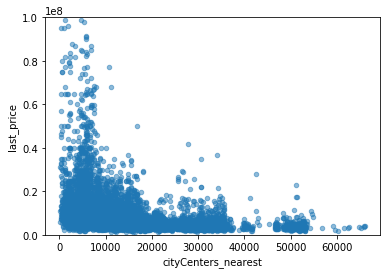

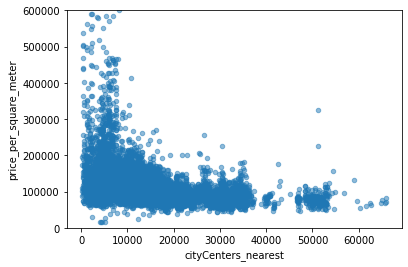

In [35]:
# цена и удаленность от центра
print(data['cityCenters_nearest'].corr(data['last_price']))
print(data['cityCenters_nearest'].corr(data['price_per_square_meter']))

# диграмма рассеивания
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.5, ylim=(0, 100000000))
data.plot(x='cityCenters_nearest', y='price_per_square_meter', kind='scatter', alpha=0.5, ylim=(0, 600000))

Чем ближе центр, тем выше цена недвижимости и цена за квадратный метр

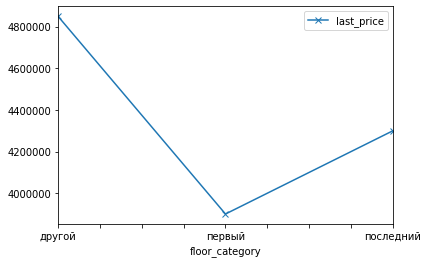

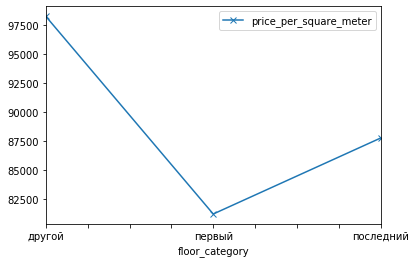

In [36]:
#цена и этаж

#оценим медиану строимости квартиры в зависимости от категории этажа квартиры
float_category_last_price = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['count', 'median'])
float_category_last_price.plot(y='median', style='x-')

#оценим медиану строимости квадратного метра квартиры в зависимости от категории этажа квартиры
float_category_price_per_square_meter= data.pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['count', 'median'])
float_category_price_per_square_meter.plot(y='median', style='x-')

Квартиры на первых и последних этажах дешевле, чем на других. Квартиры на первых этажах дешевле, чем на последних

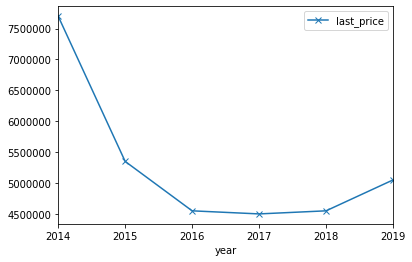

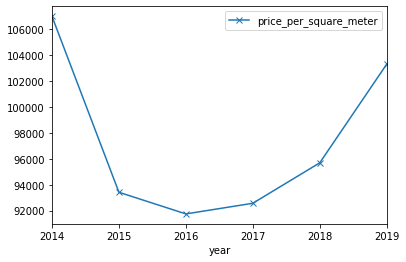

In [37]:
# цена и год размещения

#оценим медиану строимости квартиры в зависимости от года размещения
year_last_price = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['count', 'median'])
year_last_price.plot(y='median', style='x-')

#оценим медиану строимости квадратного метра квартиры в зависимости от года размещения
year_last_price = data.pivot_table(index = 'year', values = 'price_per_square_meter', aggfunc = ['count', 'median'])
year_last_price.plot(y='median', style='x-')


Стоимость квартир и цены за квадратный метр снижалась до 2016 года, потом тренд изменился - стоимость начала возрастать. Возможно, снижение цен на недвижимость было связано со снижением уровня дохода населения после введения санкций относительно РФ, последующий рост цены на недвижимость может быть связан с изменением политики налогооблажения

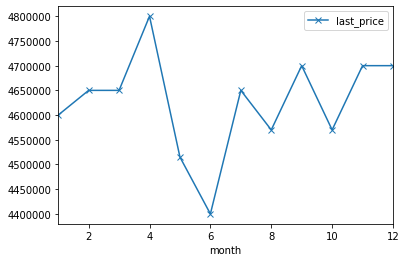

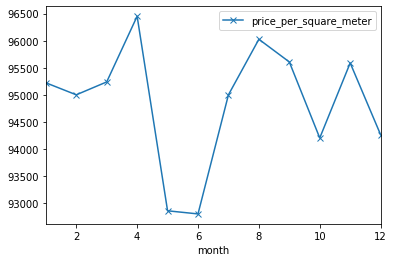

In [38]:
# цена и месяц размещения

#оценим медиану строимости квартиры в зависимости от месяца размещения
year_last_price = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['count', 'median'])
year_last_price.plot(y='median', style='x-')

#оценим медиану строимости квадратного метра квартиры в зависимости от года размещения
year_last_price = data.pivot_table(index = 'month', values = 'price_per_square_meter', aggfunc = ['count', 'median'])
year_last_price.plot(y='median', style='x-')

Можно говорить о сезонности данного рынка. Самая высокая стоимость недвижимости в апреле и августе, а самая низкая стоимость в мае и июне. Данный феномен может быть связан с отпусками и началом учебного года

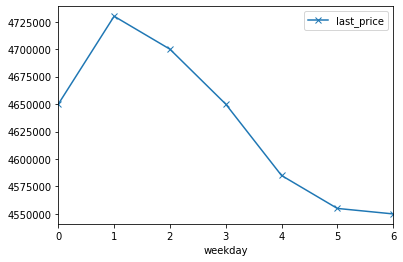

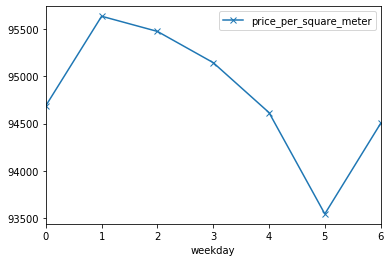

In [39]:
# цена и день размещения

#оценим медиану строимости квартиры в зависимости от дня размещения
year_last_price = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['count', 'median'])
year_last_price.plot(y='median', style='x-')

#оценим медиану строимости квадратного метра квартиры в зависимости от дня размещения
year_last_price = data.pivot_table(index = 'weekday', values = 'price_per_square_meter', aggfunc = ['count', 'median'])
year_last_price.plot(y='median', style='x-')

Самая высокая цена на недвижимость во вторник, самая низкая в субботу. Возможно, стоимость выставленной на продажу недвижимости зависит от общей активности людей, более высокой в рабочие дни

In [40]:
# средняя цена за квадратный метр в 10 населённых пунктов с наибольшим числом объявлений
locality_name_pivot_table = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['mean', 'median', 'count'])
locality_name_pivot_table.columns = ['mean', 'median', 'count']
name_pivot_table = locality_name_pivot_table.sort_values(by='count', ascending = False).head(10)
print(name_pivot_table.sort_values(by='mean', ascending = False))

                            mean         median  count
locality_name                                         
Санкт-Петербург    114851.715283  104761.904762  15721
Пушкин             103125.819291  100000.000000    369
деревня Кудрово     92473.547576   91860.465116    299
посёлок Парголово   90175.913458   91642.857143    327
посёлок Мурино      85752.189195   85878.462169    522
посёлок Шушары      78677.364217   76876.172608    440
Колпино             75424.579098   74723.748474    338
Гатчина             68746.146763   67796.610169    307
Всеволожск          68654.473986   65789.473684    398
Выборг              58141.909153   58158.319871    237


Из 10 населённых пунктов с самым большим количеством объявлений самая высокая стоимость за квадратный метр в Санкт-Петербурге, самая низкая в Выборге

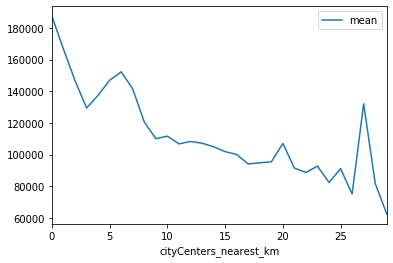

In [41]:
spb_data = data.query('locality_name == "Санкт-Петербург"').reset_index() 
spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest'] / 1000

# удалим из анализа пропущенные значения и округлим до целых значений
spb_data = spb_data.dropna(subset = ['cityCenters_nearest_km']).reset_index(drop = True)
spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest_km'].astype('int')

# Посчитаем среднюю цену для каждого км
spb_data_pivot_table = spb_data.pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter', aggfunc=['mean'])
spb_data_pivot_table.columns = ['mean']
spb_data_pivot_table.plot()


Центром будем считать радиусом в 3 км. Выбор данного радиуса обусловлен тем, что это первый экстремум изменения цены в зависимости от удаленности от центра и он хорошо совпадает с географичеким центром.

count    1159.000000
mean       97.399172
std        55.772422
min        12.000000
25%        62.000000
50%        84.100000
75%       115.250000
max       517.000000
Name: total_area, dtype: float64


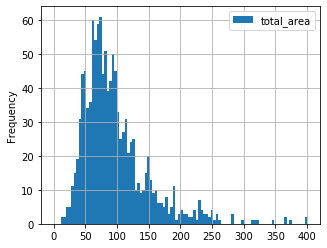

In [42]:
# Анализ квартир в центре Санкт-Петербурга
spb_certer_radius = 3
center_spb_data = spb_data.query('cityCenters_nearest_km <= @spb_certer_radius and locality_name == "Санкт-Петербург"')

# общая площадь
center_spb_data.plot(y='total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0, 400))
print(center_spb_data['total_area'].describe()) #распределение Пуассона 

count    1.159000e+03
mean     1.602257e+07
std      3.292117e+07
min      2.100000e+06
25%      7.000000e+06
50%      9.500000e+06
75%      1.447000e+07
max      7.630000e+08
Name: last_price, dtype: float64


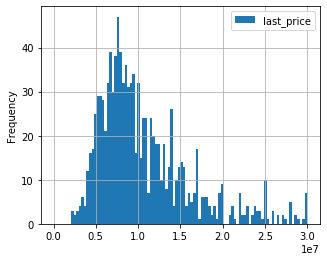

In [43]:
# цена
center_spb_data.plot(y='last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0, 30000000))
print(center_spb_data['last_price'].describe()) #распределение Пуассона

count    1154.000000
mean        3.117851
std         1.548850
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64


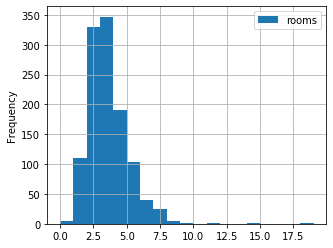

In [44]:
# число комнат
center_spb_data.plot(y='rooms', kind = 'hist', bins = 19, grid=True, figsize = (5,4), range = (0, 19))
print(center_spb_data[center_spb_data['rooms'] != 0]['rooms'].describe()) #распределение Пуассона

count    795.000000
mean       3.195396
std        0.377474
min        2.450000
25%        3.000000
50%        3.160000
75%        3.400000
max        5.800000
Name: ceiling_height, dtype: float64


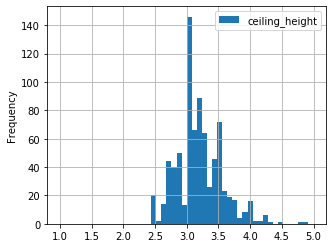

In [53]:
# высота потолков
center_spb_data.plot(y='ceiling_height', kind = 'hist', bins = 50, grid=True, figsize = (5,4), range = (1, 5))
print(center_spb_data[center_spb_data['ceiling_height'] != 0]['ceiling_height'].describe())

Характеристики квартир в центре Санкт-Петербурга отличаются от общей выборки: общая площадь больше (медиана 84.1 против 52), цена выше (медиана 9.5 млн против 4.65 млн), комнат в квартирах больше (медиана 3 против 2) и выше высота потолков (медиана 3.16 против 2.65)

0.2553440822918841


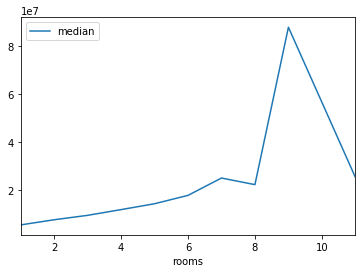

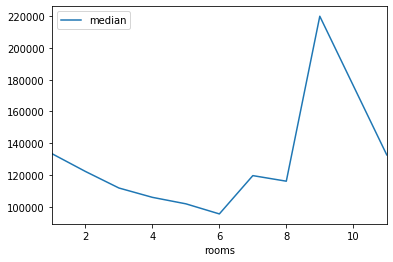

In [46]:
# цена и число комнат
center_spb_last_price_rooms = center_spb_data[(center_spb_data['rooms'] != 0) & (center_spb_data['rooms'] < 14)].pivot_table(index = 'rooms', values='last_price', aggfunc=['mean', 'median'])
center_spb_last_price_rooms.columns = ['mean', 'median']
center_spb_last_price_rooms.plot(y='median')

# корреляция между ценой и числом комнат
print(center_spb_data[center_spb_data['rooms'] < 14]['rooms'].corr(center_spb_data[center_spb_data['rooms'] < 14]['last_price']))

# цена за квадратный метр и число комнат
center_spb_price_meter_rooms = center_spb_data[(center_spb_data['rooms'] != 0) & (center_spb_data['rooms'] < 14)].pivot_table(index = 'rooms', values='price_per_square_meter', aggfunc=['mean', 'median'])
center_spb_price_meter_rooms.columns = ['mean', 'median']
center_spb_price_meter_rooms.plot(y='median')

Число комнат слабо положительно связано с ростом цены на недвижимость (коэф корреляции Пирсона 0.3). При этом, зависимость медианы цены квадратного метра недвижимости от числа комнат имеет нелинейный характер: до шести комнат имеет место отрицательный тренд, от девяти положительный

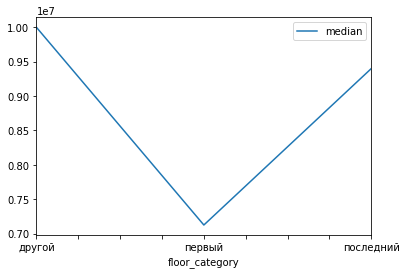

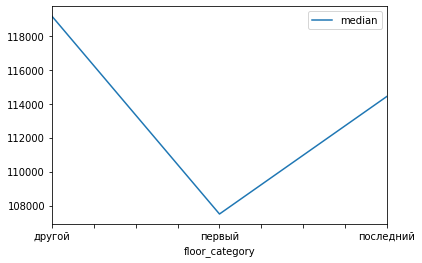

In [47]:
# цена и этаж
center_spb_last_price_floor = center_spb_data.pivot_table(index = 'floor_category', values='last_price', aggfunc=['mean', 'median'])
center_spb_last_price_floor.columns = ['mean', 'median']
center_spb_last_price_floor.plot(y='median')

# цена за квадратный метр и этаж
center_spb_price_meter_floor = center_spb_data.pivot_table(index = 'floor_category', values='price_per_square_meter', aggfunc=['mean', 'median'])
center_spb_price_meter_floor.columns = ['mean', 'median']
center_spb_price_meter_floor.plot(y='median')

Можно отметить сходство с трендом для всей выборки: на первом и последнем этаже цена за квадратный метр недвижимости ниже, чем на других этажах и цена на первом этаже ниже, чем на последнем. 

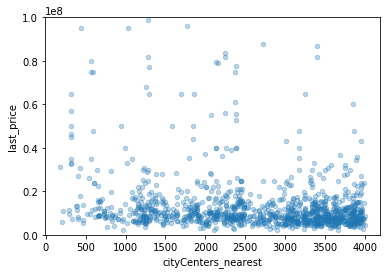

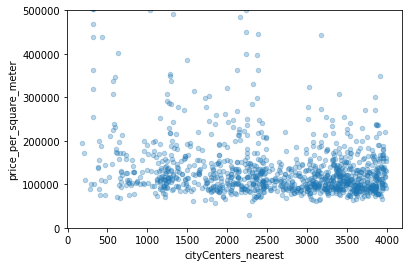

In [48]:
# цена и удаленность от центра
center_spb_data.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter', ylim=(0, 100000000), alpha = 0.3)

# цена за квадратный метр и удаленность от центра
center_spb_data.plot(x = 'cityCenters_nearest', y = 'price_per_square_meter', kind = 'scatter', ylim=(0, 500000), alpha = 0.3)

Зависимость цены и цены квадратного метра в центре города не просматривается

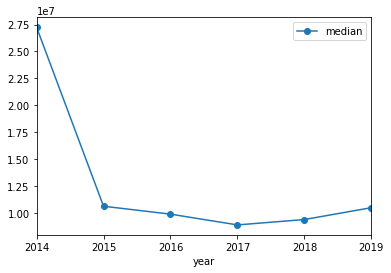

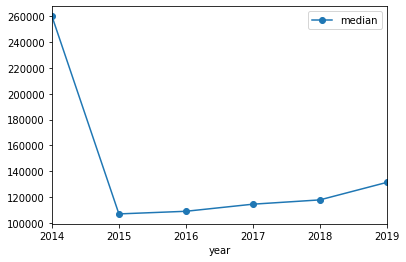

In [49]:
# цена и год размещения объявления

# цена и год
center_spb_last_year = center_spb_data.pivot_table(index = 'year', values='last_price', aggfunc=['mean', 'median'])
center_spb_last_year.columns = ['mean', 'median']
center_spb_last_year.plot(y='median', style='o-')

# цена за квадратный метр и год
center_spb_price_meter_year = center_spb_data.pivot_table(index = 'year', values='price_per_square_meter', aggfunc=['mean', 'median'])
center_spb_price_meter_year.columns = ['mean', 'median']
center_spb_price_meter_year.plot(y='median', style='o-')

Тренд изменения цены на недвижимость в центре Санкт-Петербурга отличается от тренда для общей выборки: в центре Санкт-Петербурга стоимость за квадратный метр растет с 2015 года, в то время как общая выборка демонтрирует рост с 2016 года. 

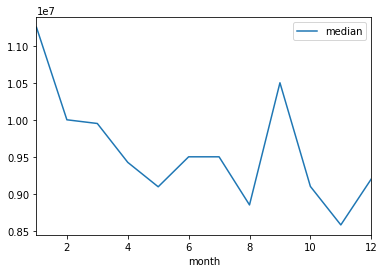

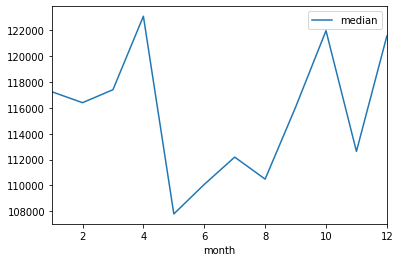

In [50]:
# цена и месяц размещения объявления

# цена и месяц
center_spb_last_month = center_spb_data.pivot_table(index = 'month', values='last_price', aggfunc=['mean', 'median'])
center_spb_last_month.columns = ['mean', 'median']
center_spb_last_month.plot(y='median')

# цена за квадратный метр и месяц
center_spb_price_meter_month = center_spb_data.pivot_table(index = 'month', values='price_per_square_meter', aggfunc=['mean', 'median'])
center_spb_price_meter_month.columns = ['mean', 'median']
center_spb_price_meter_month.plot(y='median')

Как и в общей выборке, можно говорить о сезонности. Самая высокая стоимость за квадратный метр недвижимости в апреле, октябре и декабре, самая низкая в мае и августе. Данный тренд несколько отличается от общей выборки, где самая высокая стоимость в апреле и августе, а самая низкая стоимость в мае и июне. 

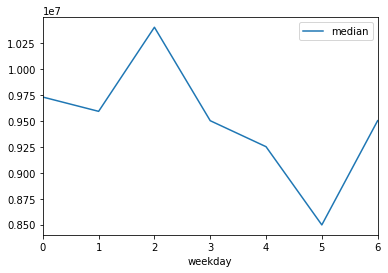

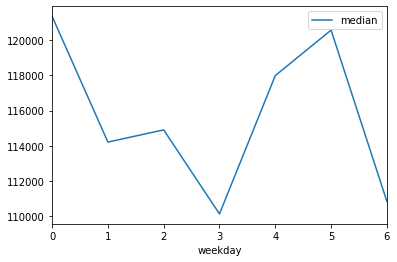

In [51]:
# цена и день размещения объявления

# цена и день
center_spb_last_weekday = center_spb_data.pivot_table(index = 'weekday', values='last_price', aggfunc=['mean', 'median'])
center_spb_last_weekday.columns = ['mean', 'median']
center_spb_last_weekday.plot(y='median')

# цена за квадратный метр и день
center_spb_price_meter_weekday = center_spb_data.pivot_table(index = 'weekday', values='price_per_square_meter', aggfunc=['mean', 'median'])
center_spb_price_meter_weekday.columns = ['mean', 'median']
center_spb_price_meter_weekday.plot(y='median')

Тренд отличается от общей выборки: минимальные цены за квадратный метр в четверг, самые высокие - в пятницу, субботу и понедельник

[К оглавлению](#content)

<a id = '4'></a>
## Вывод

Был изучен файл с первоначальными данными, на предмет соответствия данных необходимым типам и наличия пропусков значений. В результате предобработки был приведен к соответствию формат данных. В столбцах «Balcony» и «days_exposition» пропущенные/отсутствующие данные были заменены нулями. 
Были отмечены выбросы в столбцах цена, высота потолков и жилая площадь. В анализе значения данных столбцов оставила без изменений. О причине появления данных выбросов стоит спросить у коллег, которые предоставили выборку.
Отмечены квартиры с 0 комнатами. Возможно, это квартиры-студии, но число квартир студий не совпадает с числом квартир с 0 количеством комнат. Это нужно уточнить у коллег, которые предоставили выборку. В своем анализе 0 значения комнат я не использовала.  

Были рассчитаны и добавлены в таблицу цена квадратного метра, день недели, месяц и год публикации, категории этажа квартиры, соотношение жилой и общей площади и кухни и общей площади.

Чтобы оценить время продажи квартиры использовался день снятия квартиры с объявления. Стоит учитывать, что данные значения могут быть не равны. Так, были отмечены выбросы в 7, 30, 45, 60 и 90 дней (максимальные пики в 45 и 60 дней), которые могут совпадать с днями отсечки по объявлению. Из анализа данные выбросы были исключены. В результате построения диаграммы рассеивания было определено, что нормальные значения продажи квартиры находятся в диапазоне от 1 до 580 дней (медиана 114 дней).

Для всей выборки, чем больше площадь и ближе квартира к центру города тем выше стоимость квадратного метра недвижимости. Стоимость квадратного метра снижается с ростом комнат до трех, а потом возрастает. Квартиры на первых этажах в среднем самые дешевые, так же квартиры на последних этажах дешевле, чем на других.

Стоимость квартир снижалась с 2014 года до 2016 года.  Начиная с 2016 года отмечен рост. Отмечена сезонность в продаже квартир: самая высокая стоимость недвижимости в апреле и августе, а самая низкая стоимость в мае и июне. 

Самая высокая средняя цена квадратного метра в Санкт-Петербурге. Стоимость квартир в центре Санкт-Петербурга была проанализирована отдельно (центром города по результату расчета изменения цены на недвижмость считаем удаленность до 3х км). Данные по центру Санкт-Петербурга несколько отличаются от общей выборки: отмечается рост квадратного метра недвижимости начиная с 2015 года и несколько другая сезонность. Так же сильно отличаются характеристики квартир в центре Санкт-Петербурга от общей выборки: общая площадь больше (медиана 84.1 против 52), цена выше (медиана 9.5 млн против 4.65 млн), комнат в квартирах больше (медиана 3 против 2) и выше высота потолков (медиана 3.17 против 2.65).
Число комнат слабо положительно связано с ростом цены на недвижимость (коэф корреляции Пирсона 0.3). При этом зависимость медианы цены квадратного метра недвижимости от числа комнат имеет нелинейный характер: до шести комнат имеет место отрицательный тренд, от девяти положительный
Таким образом, можно сделать вывод, что характер изменения цены на недвижимость может отличаться в зависимости от региона и для более точно результат стоит проанализировать каждый регион в отдельности.


[К оглавлению](#content)